In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import matplotlib.pyplot as plt

/mnt/datadisk2/aglv/anaconda3/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
cd /mnt/datadisk2/aglv/aglv/lab_aglv/forintern/

/mnt/datadisk2/aglv/aglv/lab_aglv/forintern


In [3]:
path_factor = '/mnt/datadisk2/aglv/aglv/aglv_factor/bs_book3/'

In [4]:
from DataDaily import DataDaily
datadaily = DataDaily()

load ./data_daily.h5...


In [5]:
vol = datadaily.volume
close = datadaily.adjclose
open = datadaily.adjopen
ret = (close / close.shift(1) - 1).loc[20210101:20231231]
night_ret = ((open - close.shift(1)) / open).loc[20210101:20231231]

In [6]:
r_win = 5

buy_l_order = datadaily.buy_value_large_order.loc[20210101:20231231]
sell_l_order = datadaily.sell_value_large_order.loc[20210101:20231231]
buy_xl_order = datadaily.buy_value_exlarge_order.loc[20210101:20231231]
sell_xl_order = datadaily.sell_value_exlarge_order.loc[20210101:20231231]

buy_s_order = datadaily.buy_value_small_order.loc[20210101:20231231]
sell_s_order = datadaily.sell_value_small_order.loc[20210101:20231231]

buy_l_order_act = datadaily.buy_value_large_order_act.loc[20210101:20231231]
buy_l_order_act_os = datadaily.buy_value_large_order_act.loc[20231231:20231231]
sell_l_order_act = datadaily.sell_value_large_order_act.loc[20210101:20231231]
buy_xl_order_act = datadaily.buy_value_exlarge_order_act.loc[20210101:20231231]
sell_xl_order_act = datadaily.sell_value_exlarge_order_act.loc[20210101:20231231]

buy_l_order_demean = buy_l_order / buy_l_order.rolling(r_win).mean()
sell_l_order_demean = sell_l_order / sell_l_order.rolling(r_win).mean()
buy_xl_order_demean = buy_xl_order / buy_xl_order.rolling(r_win).mean()
sell_xl_order_demean = sell_xl_order / sell_xl_order.rolling(r_win).mean()

buy_l_order_act_demean = buy_l_order_act / buy_l_order_act.rolling(r_win).mean()
sell_l_order_act_demean = sell_l_order_act / sell_l_order_act.rolling(r_win).mean()
buy_xl_order_act_demean = buy_xl_order_act / buy_xl_order_act.rolling(r_win).mean()
sell_xl_order_act_demean = sell_xl_order_act / sell_xl_order_act.rolling(r_win).mean()

buy_l_s_ratio = buy_l_order / buy_s_order
sell_l_s_ratio = sell_l_order / sell_s_order

In [8]:
def factor_distribution_plot(data):
    '''
    将因子值二维数组转化为分布图形式
    '''
    import seaborn as sns

    if len(data.shape) > 1:
        data = data.stack()

    plt.figure(figsize=(10, 6))

    plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Histogram')
    sns.kdeplot(data, color='red', label='KDE')

    plt.title('Data Distribution')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

    plt.show()

In [9]:
def twist_factor(factor:pd.DataFrame):
    factor = factor.replace(np.inf, np.nan).replace(-np.inf, np.nan)
    factor = ((factor.T - factor.median(axis=1)) / (factor.std(axis=1) + 1e-10)).T
    factor = factor.applymap(lambda x: x if x > 0 else -x)
    factor = ((factor.T - factor.mean(axis=1)) / (factor.std(axis=1) + 1e-10)).T
    return factor

In [10]:
import seaborn as sns
def factor_self_corr(factor:pd.DataFrame, gap=1, win=20):
    if len(factor.shape) < 1:
        if 'date' in factor.columns:
            factor = factor.set_index('date')
        elif 'Date' in factor.columns:
            factor = factor.set_index('Date')
    
    factor.index = [str(i) for i in factor.index]

    factor_corr = factor.rolling(win).apply(lambda x: x.corr(x.shift(-1)))

    plt.figure(figsize=(12, 6))
    plt.plot(factor_corr, color='#FF9999')
    plt.tight_layout()
    plt.xticks(ticks=range(0, len(factor_corr), max(1, len(factor_corr)//10)), 
               labels=factor_corr.index[::max(1, len(factor_corr)//10)], rotation=45)
    plt.title(f'Factor Self-rolling{win}-shift{gap}-Corr')
    plt.show()


In [11]:
def dropinf(factor:pd.DataFrame):
    return factor.replace(np.inf, np.nan).replace(-np.inf, np.nan)

In [14]:
ret

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301600,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.022537,-0.011821,-0.032712,-0.050514,-0.030074,-0.080499,-0.109843,-0.053882,-0.055033,NaN
20241031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.012160,0.021854,0.096114,0.003941,0.007179,0.029420,-0.028639,-0.016359,-0.054655,NaN
20241101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.082575,-0.052229,-0.066306,-0.071884,-0.070822,-0.106548,-0.126394,-0.046514,-0.038954,-0.098109


In [15]:
close = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/close_21_23.h5')

In [30]:
buy_sell_per_nightret = dropinf((buy_l_order - sell_l_order) / sell_l_order * night_ret)

In [27]:
buy_sell_per_nightret.to_csv(path_factor + 'buy_sell_per_nightret.csv')

In [33]:
np.log(buy_sell_per_nightret.replace(0, np.nan)).to_csv(path_factor + 'buy_sell_per_nightret_log.csv')

<ipython-input-33-bd24aa1a9ae6>:1: RuntimeWarning: invalid value encountered in log
  np.log(buy_sell_per_nightret.replace(0, np.nan)).to_csv(path_factor + 'buy_sell_per_nightret_log.csv')


<ipython-input-34-be86f9b8ab89>:1: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(np.log(twist_factor(buy_sell_per_nightret).replace(0, np.nan)))


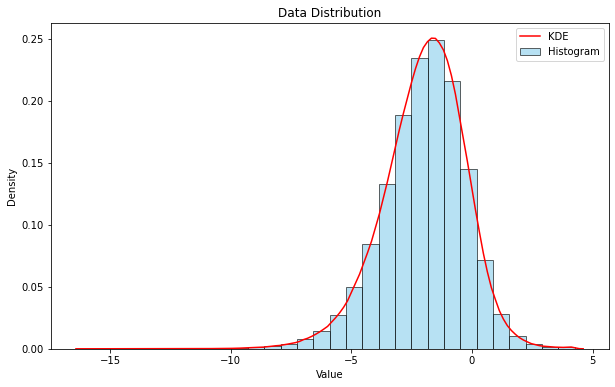

In [34]:
factor_distribution_plot(np.log(twist_factor(buy_sell_per_nightret).replace(0, np.nan)))

In [35]:
np.log(twist_factor(buy_sell_per_nightret).replace(0, np.nan)).to_csv(path_factor + 'buy_sell_per_nightret_twist_log.csv')

<ipython-input-35-dad38c4597fa>:1: RuntimeWarning: invalid value encountered in log
  np.log(twist_factor(buy_sell_per_nightret).replace(0, np.nan)).to_csv(path_factor + 'buy_sell_per_nightret_twist_log.csv')


In [ ]:
buy_sell_per_nightret

In [12]:
def factors_corr(factor_folder, method='mean', is_style=False):
    '''检测因子之间相关性'''
    import glob, os
    import seaborn as sns

    csv_path = glob.glob(os.path.join(factor_folder, '*.csv'))
    new_path = []
    for p in csv_path:
        '''对文件夹下因子进行筛选'''
        f_name = p.split('/')[-1][:-4]
        new_path.append(p)
    
    new_path = new_path[:8]

    dfs = [pd.read_csv(f).set_index('date') for f in new_path]

    # 是否要加入风格因子
    if is_style:
        style_path = '/mnt/datadisk2/aglv/aglv/aglv_factor/style_factor/'

    # z-score标准化
    for df in dfs:
        df = df.replace(np.inf, np.nan).replace(-np.inf, np.nan)
        df = ((df.T - df.mean(axis=1)) / (df.std(axis=1) + 1e-10)).T

    num = len(dfs)
    print(num)

    corrs = pd.DataFrame(index=range(num), columns=range(num))
    for i in range(num):
        print(i, new_path[i].split('/')[-1][:-4])
        for j in range(num):
            if j < i:
                corrs.iloc[i, j] = corrs.iloc[j ,i]
            elif j == i:
                corrs.iloc[i, j] = 1
            else:
                if method == 'mean':
                    corrs.iloc[i, j] = dfs[i].corrwith(dfs[j]).mean()
                elif method == 'median':
                    corrs.iloc[i, j] = dfs[i].corrwith(dfs[j]).median()
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(corrs.astype(float), annot=True, cmap='Greens', fmt=".2f")
    plt.title('Correlation with Means Heatmap')
    plt.show()


5
0 buy_ls_ratio_ret
1 buy_ret_act_trans2
2 buy_per_ret_log
3 netbuy_per_log_demed
4 exce_buy_l_log


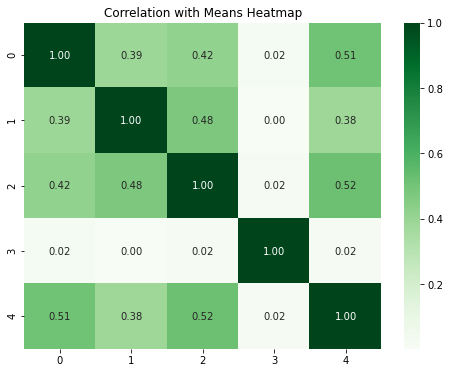

In [48]:
factors_corr('/mnt/datadisk2/aglv/aglv/aglv_factor/aglv_factor', method='median')

In [13]:
data2123 = pd.read_hdf('/mnt/datadisk2/aglv/aglv/lab_aglv/data21_23.h5')
data2123

Open  Close   High    Low  LastVolume  \
Date     InstrumentID EndTime                                           
20210104 SZ000001     09:31    19.10  18.90  19.10  18.82   3155510.0   
                      09:32    18.90  18.80  18.90  18.78   1791334.0   
                      09:33    18.80  18.84  18.85  18.81   1656900.0   
                      09:34    18.84  18.67  18.82  18.65   2376914.0   
                      09:35    18.67  18.57  18.65  18.50   2616000.0   
...                              ...    ...    ...    ...         ...   
20231012 SH689009     14:56    33.94  33.88  33.94  33.88     23275.0   
                      14:57    33.92  33.89  33.92  33.86      9297.0   
                      14:58    33.89  33.89  33.89  33.89         0.0   
                      14:59    33.89  33.89  33.89  33.89         0.0   
                      15:00    33.77  33.77  33.77  33.77     62011.0   

                               LastTurnOver  
Date     InstrumentID EndTime                
20210104 SZ000001     09:31     59855405.18  
                      09:32     33745895.32  
                      09:33     31190135.00  
                      09:34     44535547.45  
                      09:35     48631903.70  
...                                     ...  
20231012 SH689009     14:56       789311.00  
                      14:57       315093.00  
                      14:58            0.00  
                      14:59            0.00  
                      15:00      2094111.00  

[751830321 rows x 6 columns]

In [14]:
data2123 = data2123[['Close', 'LastVolume']]
data2123

Close  LastVolume
Date     InstrumentID EndTime                   
20210104 SZ000001     09:31    18.90   3155510.0
                      09:32    18.80   1791334.0
                      09:33    18.84   1656900.0
                      09:34    18.67   2376914.0
                      09:35    18.57   2616000.0
...                              ...         ...
20231012 SH689009     14:56    33.88     23275.0
                      14:57    33.89      9297.0
                      14:58    33.89         0.0
                      14:59    33.89         0.0
                      15:00    33.77     62011.0

[751830321 rows x 2 columns]

In [51]:
p_vol_corr = data2123.groupby(level='Date').apply(lambda x: x.groupby(level='InstrumentID').apply(lambda x: x.iloc[:, 0].corr(x.iloc[:, 1])))
p_vol_corr

Date      InstrumentID
20210104  SH600000       -0.034089
          SH600004        0.014325
          SH600006       -0.635465
          SH600007       -0.246806
          SH600008        0.094519
                            ...   
20231012  SZ301533       -0.053772
          SZ301548       -0.077084
          SZ301550       -0.252096
          SZ301558        0.461458
          SZ301559       -0.193166
Length: 3130989, dtype: float64

In [53]:
p_vol_corr2 = p_vol_corr.unstack(level='InstrumentID')
p_vol_corr2

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301519,SZ301520,SZ301525,SZ301528,SZ301529,SZ301533,SZ301548,SZ301550,SZ301558,SZ301559
Date,,,,,,,,,,,,,,,,,,,,,
20210104,-0.034089,0.014325,-0.635465,-0.246806,0.094519,0.158250,0.035707,0.115378,0.051744,0.015751,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,-0.063928,-0.019625,0.696016,0.021408,0.243980,-0.141628,0.126631,0.380546,-0.070693,0.053344,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,-0.024461,0.054379,0.551748,0.193343,-0.003562,0.544683,-0.032786,0.072710,0.182898,0.144089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,0.414942,-0.225069,0.365951,-0.308296,-0.090874,-0.055285,0.086666,0.378895,0.095195,0.328726,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,0.353384,-0.291318,-0.277970,-0.356783,0.131191,0.422681,-0.089921,-0.192955,-0.251633,0.288721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230928,-0.137638,0.039036,0.139510,-0.015836,0.095911,0.031605,-0.206108,0.081766,0.204273,-0.138262,...,-0.280350,0.329650,0.097579,0.090493,-0.451656,0.279682,0.032436,-0.035584,0.247838,NaN
20231009,-0.096999,0.024983,-0.114938,-0.077821,-0.115417,0.176745,-0.152512,-0.187651,-0.079470,-0.192758,...,0.235473,-0.111001,-0.324561,-0.409202,0.404443,0.133024,0.165036,0.086143,0.391795,NaN
20231010,0.260555,0.321583,0.222596,-0.068108,0.050827,0.437435,0.062630,0.032251,-0.043834,0.260318,...,-0.102238,0.419450,-0.110642,0.451096,0.319095,0.248612,0.258223,0.256695,0.110086,NaN


In [60]:
p_vol_corr2.index = [int(i) for i in p_vol_corr2.index]

In [61]:
buy_lact_pvol_corr = buy_l_order_act * p_vol_corr2
buy_lact_pvol_corr

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628,SZ301633
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
buy_lact_pvol_corr = buy_lact_pvol_corr.loc[:20231001, :]

In [66]:
buy_lact_pvol_corr.isna().sum(axis=1)

20210104    1524
20210105    1524
20210106    1518
20210107    1512
20210108    1512
            ... 
20230922     578
20230925     580
20230926     577
20230927     580
20230928     581
Length: 667, dtype: int64

<ipython-input-69-0eb51f0f9a0a>:1: RuntimeWarning: divide by zero encountered in log
  factor_distribution_plot(dropinf(np.log(buy_lact_pvol_corr)))
<ipython-input-69-0eb51f0f9a0a>:1: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(dropinf(np.log(buy_lact_pvol_corr)))


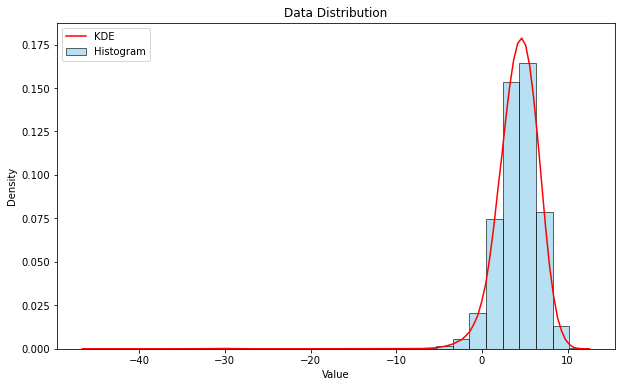

In [69]:
factor_distribution_plot(dropinf(np.log(buy_lact_pvol_corr)))

In [70]:
dropinf(buy_lact_pvol_corr).to_csv(path_factor + 'buy_lact_pvol_corr.csv')

In [77]:
buy_l_order

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628,SZ301633
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
buy_l_s_corr = buy_l_order.loc[:, buy_s_order.columns].progress_apply(lambda x: x.rolling(20).corr(buy_s_order.loc[:, x.name]))

100%|██████████| 5636/5636 [00:23<00:00, 234.97it/s]


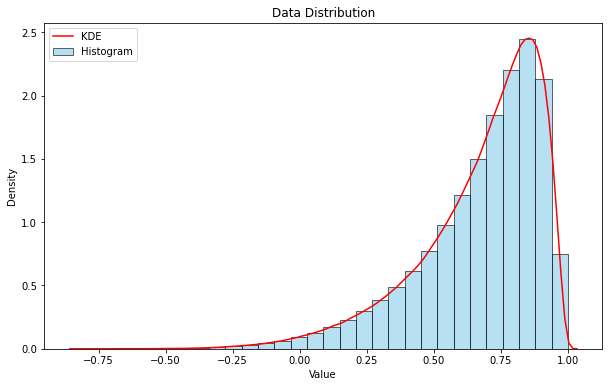

In [81]:
factor_distribution_plot(dropinf(buy_l_s_corr))

In [82]:
dropinf(buy_l_s_corr).to_csv(path_factor + 'buy_l_s_corr.csv')

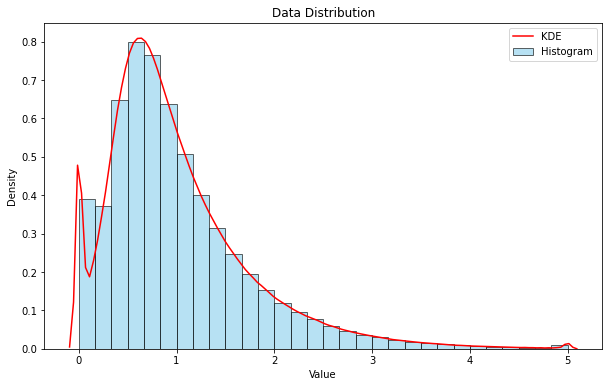

In [83]:
factor_distribution_plot(buy_l_order_act_demean)

In [88]:
buy_l_act_nighgtret_corr_r20 = (buy_l_order_act / buy_l_order_act.rolling(20).mean()).apply(lambda x: x.rolling(20).corr(night_ret.loc[:, x.name]))
buy_l_act_nighgtret_corr_r20

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628,SZ301633
date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20231225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20231227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
buy_l_act_nighgtret_corr_r20.isna().sum(axis=1)

date
20210104    5636
20210105    5636
20210106    5636
20210107    5636
20210108    5636
            ... 
20231225     603
20231226     605
20231227     604
20231228     608
20231229     606
Length: 727, dtype: int64

In [38]:
buy_sell_l_ratio = buy_l_order / sell_l_order 

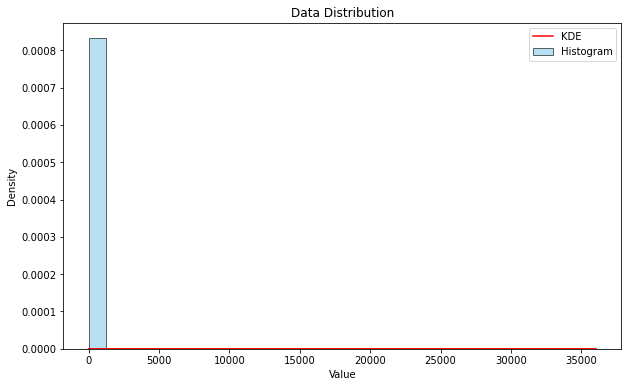

In [105]:
factor_distribution_plot(dropinf(buy_sell_l_ratio))

In [106]:
buy_sell_l_ratio.to_csv(path_factor + 'buy_sell_l_ratio.csv')

In [107]:
buy_sell_l_ratio_nightret_corr_r20 = buy_sell_l_ratio.progress_apply(lambda x: x.rolling(20).corr(night_ret.loc[:, x.name]))

100%|██████████| 5636/5636 [00:20<00:00, 269.13it/s]


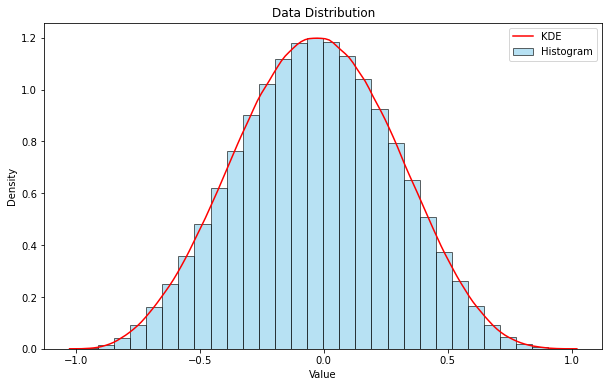

In [108]:
factor_distribution_plot(buy_l_act_nighgtret_corr_r20)

In [109]:
buy_l_act_nighgtret_corr_r20.to_csv(path_factor + 'buy_l_act_nighgtret_corr_r20.csv')

In [15]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [130]:
night_ret.index

Int64Index([20210104, 20210105, 20210106, 20210107, 20210108, 20210111,
            20210112, 20210113, 20210114, 20210115,
            ...
            20231218, 20231219, 20231220, 20231221, 20231222, 20231225,
            20231226, 20231227, 20231228, 20231229],
           dtype='int64', name='date', length=727)

In [151]:
night_ret = night_ret.applymap(lambda x: x if x > -1 else np.nan)

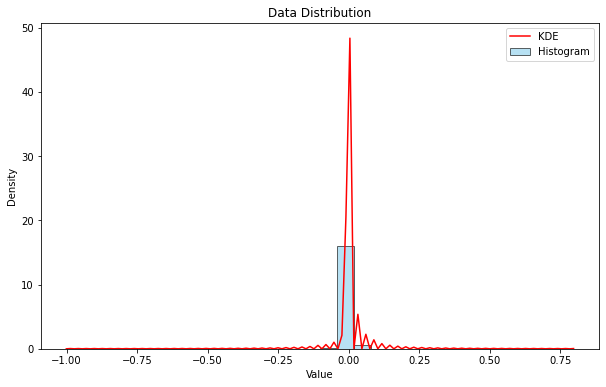

In [152]:
factor_distribution_plot(night_ret)

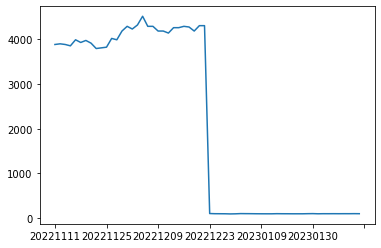

In [147]:
idx = close.index.get_loc(20221223)
period = 30
eg = close.loc[:, 'SH600654'].iloc[idx- period : idx + period]
eg.index = [str(i) for i in eg.index]
eg.plot()

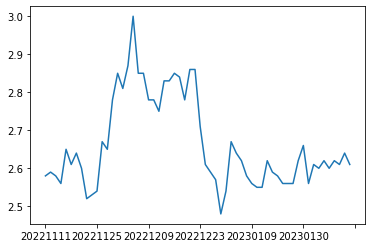

In [148]:
idx = close.index.get_loc(20221223)
period = 30
eg = datadaily.close.loc[:, 'SH600654'].iloc[idx- period : idx + period]
eg.index = [str(i) for i in eg.index]
eg.plot()

In [162]:
buy_sell_l_ratio_nightret_ratio = buy_sell_l_ratio * (sigmoid(night_ret) - 0.5)

<ipython-input-163-66849514599f>:1: RuntimeWarning: divide by zero encountered in log
  factor_distribution_plot(dropinf(np.log(buy_sell_l_ratio_nightret_ratio)))
<ipython-input-163-66849514599f>:1: RuntimeWarning: invalid value encountered in log
  factor_distribution_plot(dropinf(np.log(buy_sell_l_ratio_nightret_ratio)))


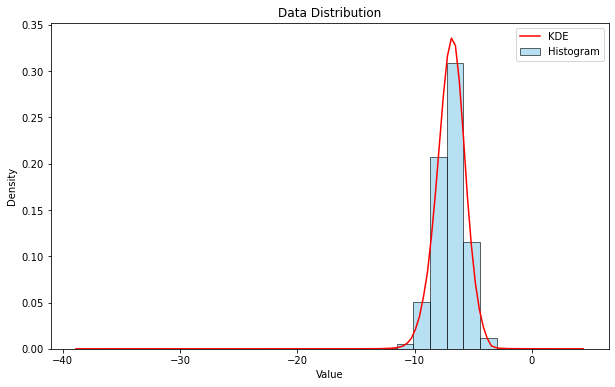

In [163]:
factor_distribution_plot(dropinf(np.log(buy_sell_l_ratio_nightret_ratio)))

In [161]:
dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_ratio.csv')

<ipython-input-161-cba522690e2c>:1: RuntimeWarning: divide by zero encountered in log
  dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_ratio.csv')
<ipython-input-161-cba522690e2c>:1: RuntimeWarning: invalid value encountered in log
  dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_ratio.csv')


In [164]:
dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_prod.csv')

<ipython-input-164-36bf93b962b0>:1: RuntimeWarning: divide by zero encountered in log
  dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_prod.csv')
<ipython-input-164-36bf93b962b0>:1: RuntimeWarning: invalid value encountered in log
  dropinf(np.log(buy_sell_l_ratio_nightret_ratio)).to_csv(path_factor + 'buy_sell_l_ratio_nightret_prod.csv')


In [15]:
mkt_cap = np.log(datadaily.mkt_cap)

In [25]:
eg = mkt_cap.iloc[0, :]
mkt_cap.apply(lambda x: len(x[x > x.mean()]), axis=1)

date
20171009    1608
20171010    1607
20171011    1609
20171012    1608
20171013    1608
            ... 
20241105    2203
20241106    2202
20241107    2197
20241108    2207
20241111    2216
Length: 1723, dtype: int64

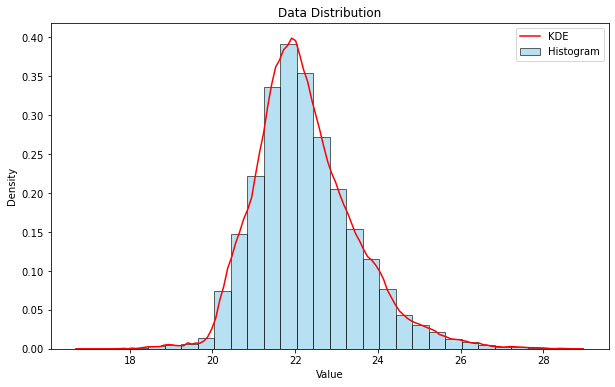

In [26]:
factor_distribution_plot(mkt_cap)

In [27]:
mkt_cap_overmean = mkt_cap.apply(lambda x: x.apply(lambda y : 1 if y > x.mean() else np.nan))

In [36]:
(buy_l_order_act * mkt_cap_overmean).to_csv(path_factor + 'buy_l_order_act_mktovermean.csv')

In [37]:
buy_l_order_act.to_csv(path_factor + 'buy_l_order_act.csv')

In [43]:
buy_sell_l_ratio = dropinf(buy_sell_l_ratio)
buy_sell_l_ratio.mean(axis=1)

date
20210104    1.014473
20210105    0.930398
20210106    0.887385
20210107    0.861518
20210108    0.950153
              ...   
20231225    1.188200
20231226    0.950047
20231227    1.143215
20231228    1.094633
20231229    1.146903
Length: 727, dtype: float64

In [51]:
buy_sell_l_ratio.corrwith(mkt_cap_overmean).mean()

nan

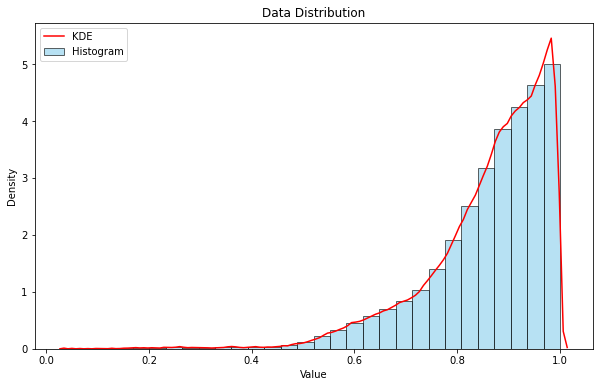

In [62]:
factor_distribution_plot(sigmoid(mkt_cap - 20))

In [63]:
(buy_sell_l_ratio * mkt_cap).to_csv(path_factor + 'bsratio_mkt_prod.csv')

In [64]:
netbuy_per = (buy_l_order - sell_l_order) / (buy_l_order + sell_l_order)

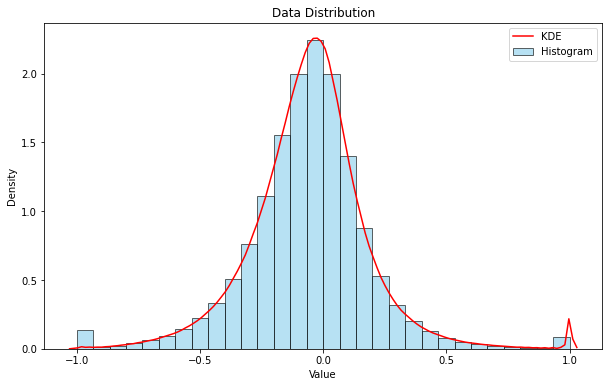

In [65]:
factor_distribution_plot(netbuy_per)

In [66]:
netbuy_per.to_csv(path_factor + 'netbuy_per.csv')

In [67]:
def factor_group(factor, group_number=10):
    '''按照因子值分组,grp1最小'''
    fg = factor.apply(
        lambda x: pd.qcut(x.rank(method='first'), q=group_number, labels=False) + 1, 
        axis=1)
        
    def _factor_group(factor_daily:pd.Series):
        dic = {f'group{str(g_value)}':factor_daily[factor_daily == g_value].index.tolist() for g_value in range(1, 1+group_number)}
        return pd.Series(dic)
    
    return {'group_stock':fg.apply(_factor_group, axis=1), 'group_index':fg}

In [70]:
mkt_group = factor_group(mkt_cap)['group_index']
mkt_group

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628,SZ301633
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,5.0,2.0,2.0,3.0,3.0,NaN
20241106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,5.0,2.0,2.0,3.0,2.0,NaN
20241107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,5.0,2.0,2.0,3.0,2.0,2.0


In [71]:
mkt_group['SH600000']

date
20171009    10.0
20171010    10.0
20171011    10.0
20171012    10.0
20171013    10.0
            ... 
20241105    10.0
20241106    10.0
20241107    10.0
20241108    10.0
20241111    10.0
Name: SH600000, Length: 1723, dtype: float64

In [16]:
volmin = data2123['LastVolume']

In [17]:
volmin

Date      InstrumentID  EndTime
20210104  SZ000001      09:31      3155510.0
                        09:32      1791334.0
                        09:33      1656900.0
                        09:34      2376914.0
                        09:35      2616000.0
                                     ...    
20231012  SH689009      14:56        23275.0
                        14:57         9297.0
                        14:58            0.0
                        14:59            0.0
                        15:00        62011.0
Name: LastVolume, Length: 751830321, dtype: float64

In [199]:
import multiprocessing
'''
传入multiindex对象, level1-InstrumentID, level2-日频data, columns为日频价量数据, 可以多列
'''
shift_day = 0
r_win = 20
n_processing = 64

def _handle_stockly(data_stock: pd.DataFrame, r_win=r_win):

    return data_stock.apply(
        lambda y : y.iloc[:30].sum() / y.sum()
        )

def process_group(group, r_win=15):
    instrument_id, group_data = group
    return (instrument_id, _handle_stockly(group_data, r_win))

def multiproces_factor(data: pd.DataFrame, n_processes=n_processing):
    grouped = list(data.groupby(level='InstrumentID'))
    with multiprocessing.Pool(processes=n_processes) as pool:
        results = list(tqdm(pool.imap(process_group, grouped), total=len(grouped)))

    factor_list = []
    for instrument_id, factor in results:
        factor_df = pd.DataFrame(factor.values, index=factor.index.get_level_values('Date'), columns=[factor.index[0][0]])
        factor_list.append(factor_df)

    factor = pd.concat(factor_list, axis=1)

    return factor

In [61]:
morn30volper = (
    volmin
    .groupby(level='Date')
    .progress_apply(
        lambda x: x.groupby(level='InstrumentID').apply(lambda y: y.iloc[:30].sum() / y.sum())
    )
)

  7%|▋         | 46/671 [02:44<16:56,  1.63s/it]  <ipython-input-61-01fb1a953b84>:5: RuntimeWarning: invalid value encountered in double_scalars
  lambda x: x.groupby(level='InstrumentID').apply(lambda y: y.iloc[:30].sum() / y.sum())
 10%|█         | 68/671 [03:22<29:51,  2.97s/it]


KeyboardInterrupt: 

In [63]:
volmin = volmin.unstack(level='InstrumentID')
volmin

InstrumentID       SH600000  SH600004    SH600006  SH600007   SH600008  \
Date     EndTime                                                         
20210104 09:31    1727980.0  257345.0  10138000.0   30600.0  1489000.0   
         09:32     865050.0  255293.0   5092700.0    3400.0   718700.0   
         09:33     877830.0  172506.0   6881859.0    4800.0   317300.0   
         09:34     835670.0  225664.0   3533000.0   11100.0   165400.0   
         09:35     436000.0  164867.0   2236900.0   23900.0   598760.0   
...                     ...       ...         ...       ...        ...   
20231012 14:56     208100.0   53500.0    199400.0    7600.0   187700.0   
         14:57      37650.0   70570.0     97100.0   18900.0   251800.0   
         14:58          0.0       0.0         0.0       0.0        0.0   
         14:59          0.0       0.0         0.0       0.0        0.0   
         15:00     783409.0   96900.0    247700.0   21400.0   608700.0   

InstrumentID      SH600009   SH600010   SH600011  SH600012   SH600015  ...  \
Date     EndTime                                                       ...   
20210104 09:31    390317.0  3122500.0  1089300.0  145500.0  1319700.0  ...   
         09:32    325080.0  2368340.0   638800.0   47500.0   443500.0  ...   
         09:33    256800.0  1626100.0   760900.0   21300.0   214400.0  ...   
         09:34    159200.0  1754700.0   571700.0   33000.0   169100.0  ...   
         09:35    347600.0  1981840.0  1363400.0   45400.0   615100.0  ...   
...                    ...        ...        ...       ...        ...  ...   
20231012 14:56     75952.0  2682200.0   163000.0    6300.0   223100.0  ...   
         14:57     45948.0   618500.0   209300.0   12500.0   386700.0  ...   
         14:58         0.0        0.0        0.0       0.0        0.0  ...   
         14:59         0.0        0.0        0.0       0.0        0.0  ...   
         15:00     78600.0  3681200.0   680000.0   18000.0   400700.0  ...   

InstrumentID      SZ301519  SZ301520  SZ301525  SZ301528  SZ301529  SZ301533  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20231012 14:56     38900.0   17200.0   14406.0   12900.0   53300.0    8600.0   
         14:57     27400.0   39900.0    5000.0    8100.0   46502.0    7300.0   
         14:58         0.0       0.0       0.0       0.0       0.0       0.0   
         14:59         0.0       0.0       0.0       0.0       0.0       0.0   
         15:00     35500.0   49700.0   23000.0   40400.0   52500.0   22300.0   

InstrumentID      SZ301548  SZ301550  SZ301558  SZ301559  
Date     EndTime                                          
20210104 09:31         NaN       NaN       NaN       NaN  
         09:32         NaN       NaN       NaN       NaN  
         09:33         NaN       NaN       NaN       NaN  
         09:34         NaN       NaN       NaN       NaN  
         09:35         NaN       NaN       NaN       NaN  
...                    ...       ...       ...       ...  
20231012 14:56     20500.0   23500.0  424700.0  202340.0  
         14:57     15600.0   67100.0  527929.0  349243.0  
         14:58         0.0       0.0       0.0       0.0  
         14:59         0.0       0.0       0.0       0.0  
         15:00     36600.0  106100.0  703611.0  334955.0  

[161118 rows x 5175 columns]

In [64]:
morn30volper = volmin.groupby(level='Date').progress_apply(lambda x: x.iloc[:30, :].sum() / x.sum())

100%|██████████| 671/671 [00:07<00:00, 86.12it/s] 


In [100]:
morn30volper = morn30volper.unstack(level='InstrumentID')
morn30volper

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301519,SZ301520,SZ301525,SZ301528,SZ301529,SZ301533,SZ301548,SZ301550,SZ301558,SZ301559
Date,,,,,,,,,,,,,,,,,,,,,
20210104,0.231740,0.221338,0.411484,0.225576,0.297115,0.336606,0.150196,0.223859,0.236047,0.303293,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,0.292681,0.246545,0.471852,0.138882,0.190833,0.219896,0.390467,0.286970,0.262000,0.206153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,0.232740,0.279081,0.341171,0.135474,0.223687,0.355628,0.229490,0.282381,0.234077,0.325736,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,0.282125,0.102019,0.192215,0.491108,0.155338,0.171340,0.381175,0.183006,0.309664,0.317063,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,0.315850,0.311981,0.386585,0.289617,0.105551,0.337496,0.614198,0.245304,0.341485,0.371837,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230928,0.143101,0.332038,0.281573,0.174419,0.091257,0.231969,0.114990,0.165986,0.210100,0.200022,...,0.251213,0.416450,0.161159,0.190289,0.296267,0.363282,0.386155,0.393611,0.489596,NaN
20231009,0.317680,0.212955,0.343589,0.126429,0.229602,0.402421,0.385117,0.232476,0.228458,0.285733,...,0.283591,0.330172,0.311455,0.267832,0.380782,0.231443,0.323861,0.287287,0.399242,NaN
20231010,0.281118,0.302942,0.349479,0.199219,0.260289,0.414741,0.307458,0.188716,0.174371,0.291973,...,0.176852,0.443845,0.297688,0.465399,0.326699,0.226669,0.220567,0.483969,0.500739,NaN


In [21]:
clomin = data2123['Close'].unstack(level='InstrumentID')
clomin

InstrumentID      SH600000  SH600004  SH600006  SH600007  SH600008  SH600009  \
Date     EndTime                                                               
20210104 09:31        9.64     14.01      8.82     12.35      2.86     76.46   
         09:32        9.60     13.97      8.84     12.36      2.84     76.17   
         09:33        9.60     14.00      8.83     12.37      2.85     76.10   
         09:34        9.58     13.90      8.83     12.33      2.85     75.74   
         09:35        9.58     13.88      8.94     12.28      2.85     75.36   
...                    ...       ...       ...       ...       ...       ...   
20231012 14:56        7.13     10.87      5.78     19.02      2.81     37.33   
         14:57        7.13     10.87      5.79     19.04      2.82     37.33   
         14:58        7.13     10.87      5.79     19.04      2.82     37.33   
         14:59        7.13     10.87      5.79     19.04      2.82     37.33   
         15:00        7.14     10.88      5.79     18.98      2.81     37.33   

InstrumentID      SH600010  SH600011  SH600012  SH600015  ...  SZ301519  \
Date     EndTime                                          ...             
20210104 09:31        1.18      4.49      6.12      6.22  ...       NaN   
         09:32        1.17      4.47      6.16      6.20  ...       NaN   
         09:33        1.17      4.47      6.17      6.21  ...       NaN   
         09:34        1.17      4.46      6.16      6.21  ...       NaN   
         09:35        1.17      4.47      6.16      6.19  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
20231012 14:56        1.73      7.81     10.83      5.72  ...     23.05   
         14:57        1.73      7.82     10.82      5.73  ...     23.06   
         14:58        1.73      7.82     10.81      5.73  ...     23.06   
         14:59        1.73      7.82     10.81      5.73  ...     23.06   
         15:00        1.72      7.81     10.83      5.71  ...     23.05   

InstrumentID      SZ301520  SZ301525  SZ301528  SZ301529  SZ301533  SZ301548  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20231012 14:56       65.80    101.99     84.05     44.24     41.43     61.38   
         14:57       65.65    101.81     84.08     44.28     41.39     61.37   
         14:58       65.64    101.81     84.10     44.28     41.39     61.34   
         14:59       65.64    101.81     84.10     44.28     41.39     61.34   
         15:00       65.64    101.90     84.29     44.35     41.40     61.33   

InstrumentID      SZ301550  SZ301558  SZ301559  
Date     EndTime                                
20210104 09:31         NaN       NaN       NaN  
         09:32         NaN       NaN       NaN  
         09:33         NaN       NaN       NaN  
         09:34         NaN       NaN       NaN  
         09:35         NaN       NaN       NaN  
...                    ...       ...       ...  
20231012 14:56       50.40     14.08     22.72  
         14:57       50.21     14.01     22.69  
         14:58       50.18     14.00     22.69  
         14:59       50.18     14.00     22.69  
         15:00       50.30     14.01     22.69  

[161118 rows x 5175 columns]

In [22]:
morn30ret = clomin.groupby(level='Date').progress_apply(lambda x: (x.iloc[30, :] - x.iloc[0, :]) / x.iloc[0, :])

  0%|          | 0/671 [00:00<?, ?it/s]

100%|██████████| 671/671 [00:05<00:00, 129.08it/s]


In [202]:
morn30ret

InstrumentID,SH600000,SH600004,SH600006,SH600007,SH600008,SH600009,SH600010,SH600011,SH600012,SH600015,...,SZ301519,SZ301520,SZ301525,SZ301528,SZ301529,SZ301533,SZ301548,SZ301550,SZ301558,SZ301559
Date,,,,,,,,,,,,,,,,,,,,,
20210104,-0.005187,0.009279,0.055556,-0.004049,0.000000,0.013471,-0.008475,0.000000,-0.006536,-0.004823,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210105,-0.010352,-0.011569,-0.073404,-0.002417,0.000000,0.001043,-0.008475,-0.013453,0.004950,-0.003231,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210106,0.009346,0.016141,-0.017182,-0.001606,-0.003509,0.018951,0.000000,-0.004577,0.019386,0.003210,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210107,-0.010142,-0.014032,0.002415,-0.011146,0.000000,-0.007748,0.025862,0.000000,-0.011200,-0.007962,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20210108,-0.001015,0.020360,-0.016867,0.001625,0.007143,0.007507,-0.008547,0.011364,0.004926,0.004808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230928,0.000000,-0.012422,0.012750,0.004122,0.003534,-0.003717,0.005848,-0.002532,-0.008101,-0.001745,...,0.007036,-0.051703,0.000000,0.002222,0.020377,0.006223,0.016644,0.019019,-0.022772,NaN
20231009,-0.009887,-0.022401,0.007143,-0.001034,0.003534,-0.019271,0.000000,0.001271,-0.010830,-0.008787,...,-0.007420,-0.006976,-0.005789,-0.002612,-0.007039,-0.018608,-0.015832,0.006105,-0.079412,NaN
20231010,-0.011220,0.005561,-0.001757,-0.012487,0.000000,0.005650,-0.005780,-0.023899,-0.006323,0.000000,...,0.000000,-0.039312,-0.023664,0.015869,0.009888,-0.003998,-0.003778,0.072708,0.103571,NaN


In [109]:
morn30volper.index = [int(i) for i in morn30volper.index]

In [110]:
bsratio_morn3per_prod = buy_sell_l_ratio * morn30volper

In [104]:
morn30volper.to_csv('/mnt/datadisk2/aglv/aglv/lab_aglv/store_data/morn30volper')

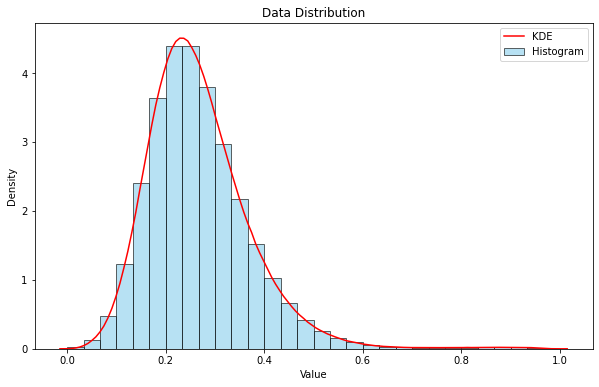

In [103]:
factor_distribution_plot(morn30volper)

In [111]:
bsratio_morn3per_prod.to_csv(path_factor + 'bsratio_morn3per_prod.csv')

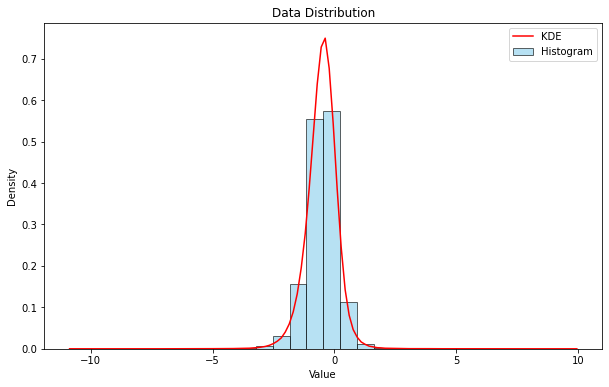

In [114]:
factor_distribution_plot(dropinf(np.log(bsratio_morn3per_prod) + 1 ))

In [115]:
dropinf(np.log(bsratio_morn3per_prod) + 1 ).to_csv(path_factor + 'bsratio_morn3per_prod_log.csv')

In [136]:
sell_l_order.apply(lambda x: (x[x == 0]).index[0], axis=1)

date
20210104    SH600137
20210105    SH600137
20210106    SH600234
20210107    SH600423
20210108    SH600052
              ...   
20231225    SH600265
20231226    SH600112
20231227    SH600112
20231228    SH600306
20231229    SH600051
Length: 727, dtype: object

In [144]:
mkt_cap.median(axis=1).mean()

22.085695565693744

In [147]:
mkt_cap.mean()

InstrumentID
BJ430017    20.381921
BJ430047    21.599759
BJ430090    19.870866
BJ430139    21.065284
BJ430198    19.534680
              ...    
SZ301613    21.300617
SZ301618    21.554975
SZ301626    21.642830
SZ301628    21.458587
SZ301633    21.331186
Length: 5636, dtype: float64

In [160]:
(buy_l_order - sell_l_order).isna().sum(axis=1)

date
20210104    1517
20210105    1516
20210106    1514
20210107    1509
20210108    1508
            ... 
20231225     551
20231226     549
20231227     548
20231228     551
20231229     548
Length: 727, dtype: int64

In [180]:
def symbol_log(x:pd.DataFrame):
    return x.apply(lambda x: np.log(x) if x > 0 else -np.log(-x))

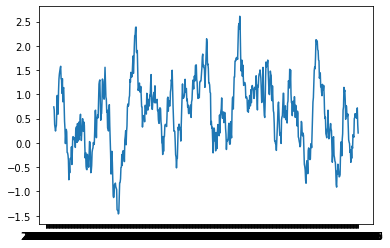

In [181]:
s = 'SH600000'
eg = (buy_l_order[s] - sell_l_order[s]) / (buy_l_order[s] + sell_l_order[s])
eg.index = [str(i) for i in eg.index]
eg_ret = ret[s]
eg_ret.index = [str(i) for i in eg_ret.index]
plt.plot(symbol_log(eg).rolling(20).mean())
# plt.plot((eg_ret * 1e+5))
plt.show()

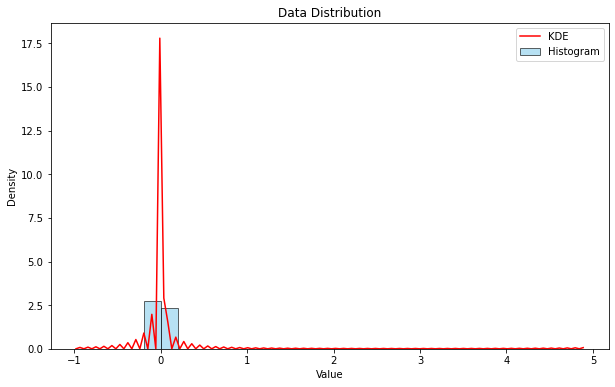

In [281]:
datadaily.adjclose

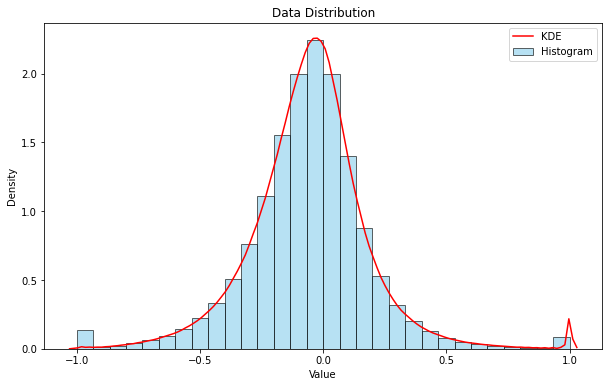

In [196]:
factor_distribution_plot((buy_l_order - sell_l_order) / (buy_l_order + sell_l_order))

In [193]:
(((buy_l_order - sell_l_order) / (buy_l_order + sell_l_order)).applymap(lambda x: np.log(x) if x > 0 else -np.log(-x))).max(axis=1)

date
20210104    10.044351
20210105     9.135629
20210106    11.456984
20210107    11.274287
20210108    10.220141
              ...    
20231225     9.636072
20231226     8.945657
20231227     9.067723
20231228     9.877553
20231229    10.713402
Length: 727, dtype: float64

In [197]:
((buy_l_order - sell_l_order) / (buy_l_order + sell_l_order)).rolling(20).mean().to_csv(path_factor + 'netbuy_per_r20mean.csv')

In [128]:
buy_l_order.apply(lambda x: len(x[x == 0]), axis=1)

date
20210104     34
20210105     40
20210106     30
20210107     21
20210108     37
           ... 
20231225     87
20231226     94
20231227    108
20231228     39
20231229     22
Length: 727, dtype: int64

In [126]:
sell_l_order.min(axis=1)

date
20210104    0.0
20210105    0.0
20210106    0.0
20210107    0.0
20210108    0.0
           ... 
20231225    0.0
20231226    0.0
20231227    0.0
20231228    0.0
20231229    0.0
Length: 727, dtype: float64

In [132]:
mkt_cap_overmean[mkt_cap_overmean == 1]

InstrumentID,BJ430017,BJ430047,BJ430090,BJ430139,BJ430198,BJ430300,BJ430418,BJ430425,BJ430476,BJ430478,...,SZ301603,SZ301606,SZ301607,SZ301608,SZ301611,SZ301613,SZ301618,SZ301626,SZ301628,SZ301633
date,,,,,,,,,,,,,,,,,,,,,
20171009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20171013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20241105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
20241106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN
20241107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0


In [105]:
morn30volper.to_csv(path_factor + 'morn30volper.csv')

In [118]:
(netbuy_per * morn30volper).to_csv(path_factor + 'netbuy_per_morn30_prod.csv')

In [207]:
morn30ret.index = [int(i) for i in morn30ret.index]

In [208]:
netbuy_per_r20mean = ((buy_l_order - sell_l_order) / (buy_l_order + sell_l_order)).rolling(20).mean()
netbuy_per_r20mean_morn30ret_prod = netbuy_per_r20mean * morn30ret

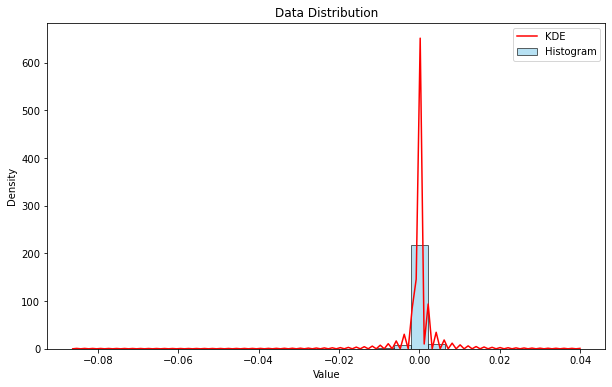

In [210]:
factor_distribution_plot(netbuy_per_r20mean_morn30ret_prod)

In [211]:
netbuy_per_r20mean_morn30ret_prod.to_csv(path_factor + 'netbuy_per_r20mean_morn30ret_prod.csv')

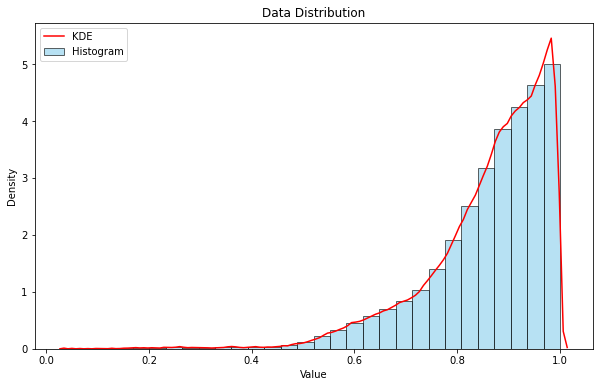

In [227]:
factor_distribution_plot(sigmoid(mkt_cap - 20))

In [231]:
mkt_cri = sigmoid(mkt_cap - 20).mean(axis=1) - 3 * sigmoid(mkt_cap - 20).std(axis=1)

In [242]:
mkt_cap * 

Index(['BJ430017', 'BJ430047', 'BJ430090', 'BJ430139', 'BJ430198', 'BJ430300',
       'BJ430418', 'BJ430425', 'BJ430476', 'BJ430478',
       ...
       'SZ301603', 'SZ301606', 'SZ301607', 'SZ301608', 'SZ301611', 'SZ301613',
       'SZ301618', 'SZ301626', 'SZ301628', 'SZ301633'],
      dtype='object', name='InstrumentID', length=5636)

In [243]:
(netbuy_per * sigmoid(mkt_cap - 20).loc[20210101:20231231]).isna().sum(axis=1)

date
20210104    1529
20210105    1525
20210106    1520
20210107    1514
20210108    1520
            ... 
20231225     567
20231226     581
20231227     580
20231228     560
20231229     554
Length: 727, dtype: int64

In [244]:
(netbuy_per * sigmoid(mkt_cap - 20)).to_csv(path_factor + 'netbuy_per_mkt_cri1.csv')

In [253]:
ret_r20std = ret.rolling(20).std()

In [269]:
def zs(data:pd.DataFrame):
    return ((data.T - data.mean(axis=1)) / (data.std(axis=1))).T

In [272]:
zs(ret_r20std).std(axis=1)

date
20210104    NaN
20210105    NaN
20210106    NaN
20210107    NaN
20210108    NaN
           ... 
20231225    1.0
20231226    1.0
20231227    1.0
20231228    1.0
20231229    1.0
Length: 727, dtype: float64

In [277]:
def drop_3sigma(data:pd.DataFrame):
    def zs(data:pd.DataFrame):
        return ((data.T - data.mean(axis=1)) / (data.std(axis=1))).T
    data_zs = zs(data)
    return data_zs.applymap(lambda x: x if abs(x) < 3 else 3* x/abs(x))

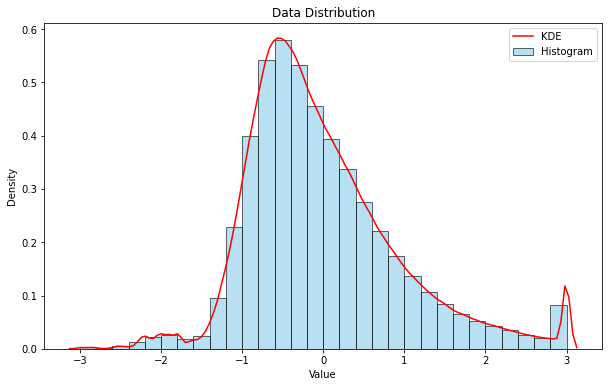

In [278]:
factor_distribution_plot(drop_3sigma(ret_r20std))

In [279]:
bsratio_morn3per_prod_log_ret20std_ratio = dropinf(np.log(bsratio_morn3per_prod) + 1 ) / drop_3sigma(ret_r20std)

In [280]:
bsratio_morn3per_prod_log_ret20std_ratio.to_csv(path_factor + 'bsratio_morn3per_prod_log_ret20std_ratio.csv')

In [44]:
bsratio = (buy_l_order / sell_l_order)

In [47]:
bsratio.isna().sum(axis=1)

date
20210104    1529
20210105    1525
20210106    1520
20210107    1514
20210108    1520
            ... 
20231225     567
20231226     581
20231227     580
20231228     560
20231229     554
Length: 727, dtype: int64

In [48]:
morn30ret.isna().sum(axis=1)

Date
20210104    1052
20210105    1051
20210106    1049
20210107    1044
20210108    1043
            ... 
20230928     110
20231009     110
20231010     109
20231011     108
20231012     108
Length: 671, dtype: int64

In [66]:
import statsmodels.api as sm
import multiprocessing
fa1 = morn30ret.copy()
fa2 = morn30volper.copy()

shift_day = 0
r_win = 5
n_processing = 64

u = set(fa1.columns).intersection(set(fa2.columns))
fa1 = fa1.loc[:, u].unstack()
fa2 = fa2.loc[:, u].unstack()

concat_fa = pd.concat([fa1, fa2], axis=1)
concat_fa.index.names = ['InstrumentID', 'date']

def _handle_stockly(data_stock: pd.DataFrame, r_win=r_win):
    def f(x, y):
        if x.isna().sum() + y.isna().sum() == 0:
            x = sm.add_constant(x)
            model = sm.OLS(y, x)
            res = model.fit()
            return res.resid[-1]
        else:
            return np.nan

    return data_stock.iloc[:, 0].rolling(r_win).apply(lambda x:f(x, data_stock.iloc[:, 1].loc[x.index]))

def process_group(group, r_win=15):
    instrument_id, group_data = group
    return (instrument_id, _handle_stockly(group_data, r_win))

def multiprocessing_factor(data: pd.DataFrame, n_processes=n_processing):
    grouped = list(data.groupby(level='InstrumentID'))
    with multiprocessing.Pool(processes=n_processes) as pool:
        results = list(tqdm(
            pool.imap(process_group, grouped), total=len(grouped)
        ))

    factor_list = []
    for instrument_id, factor in results:
        factor_df = pd.DataFrame(
            factor.values,
            index=factor.index.get_level_values('date'), 
            columns=[factor.index[0][0]]
        )
        factor_list.append(factor_df)

    factor = pd.concat(factor_list, axis=1)

    return factor

In [50]:
concat_fa.isna().sum() / len(concat_fa)

0    0.529554
1    0.567223
dtype: float64

In [67]:
morn30_ret_volper_olsresid = multiprocessing_factor(concat_fa)

100%|██████████| 5175/5175 [03:29<00:00, 24.74it/s]


In [68]:
morn30_ret_volper_olsresid.isna().sum(axis=1)

date
20210104    5175
20210105    5175
20210106    5175
20210107    5175
20210108    5175
            ... 
20230928     132
20231009     131
20231010     130
20231011     132
20231012     131
Length: 671, dtype: int64

In [69]:
morn30_ret_volper_olsresid.to_csv(path_factor + 'morn30_ret_volper_olsresid.csv')

In [40]:
bsratio_morn30ret_olsresid.to_csv(path_factor + 'bsratio_morn30ret_olsresid.csv')

In [53]:
bsratio_morn30ret_olsresid.isna().sum(axis=1)

date
20210104    5175
20210105    5175
20210106    5175
20210107    5175
20210108    5175
            ... 
20230928    5175
20231009    5175
20231010    5175
20231011    5175
20231012    5175
Length: 1398, dtype: int64

In [70]:
clomin

InstrumentID      SH600000  SH600004  SH600006  SH600007  SH600008  SH600009  \
Date     EndTime                                                               
20210104 09:31        9.64     14.01      8.82     12.35      2.86     76.46   
         09:32        9.60     13.97      8.84     12.36      2.84     76.17   
         09:33        9.60     14.00      8.83     12.37      2.85     76.10   
         09:34        9.58     13.90      8.83     12.33      2.85     75.74   
         09:35        9.58     13.88      8.94     12.28      2.85     75.36   
...                    ...       ...       ...       ...       ...       ...   
20231012 14:56        7.13     10.87      5.78     19.02      2.81     37.33   
         14:57        7.13     10.87      5.79     19.04      2.82     37.33   
         14:58        7.13     10.87      5.79     19.04      2.82     37.33   
         14:59        7.13     10.87      5.79     19.04      2.82     37.33   
         15:00        7.14     10.88      5.79     18.98      2.81     37.33   

InstrumentID      SH600010  SH600011  SH600012  SH600015  ...  SZ301519  \
Date     EndTime                                          ...             
20210104 09:31        1.18      4.49      6.12      6.22  ...       NaN   
         09:32        1.17      4.47      6.16      6.20  ...       NaN   
         09:33        1.17      4.47      6.17      6.21  ...       NaN   
         09:34        1.17      4.46      6.16      6.21  ...       NaN   
         09:35        1.17      4.47      6.16      6.19  ...       NaN   
...                    ...       ...       ...       ...  ...       ...   
20231012 14:56        1.73      7.81     10.83      5.72  ...     23.05   
         14:57        1.73      7.82     10.82      5.73  ...     23.06   
         14:58        1.73      7.82     10.81      5.73  ...     23.06   
         14:59        1.73      7.82     10.81      5.73  ...     23.06   
         15:00        1.72      7.81     10.83      5.71  ...     23.05   

InstrumentID      SZ301520  SZ301525  SZ301528  SZ301529  SZ301533  SZ301548  \
Date     EndTime                                                               
20210104 09:31         NaN       NaN       NaN       NaN       NaN       NaN   
         09:32         NaN       NaN       NaN       NaN       NaN       NaN   
         09:33         NaN       NaN       NaN       NaN       NaN       NaN   
         09:34         NaN       NaN       NaN       NaN       NaN       NaN   
         09:35         NaN       NaN       NaN       NaN       NaN       NaN   
...                    ...       ...       ...       ...       ...       ...   
20231012 14:56       65.80    101.99     84.05     44.24     41.43     61.38   
         14:57       65.65    101.81     84.08     44.28     41.39     61.37   
         14:58       65.64    101.81     84.10     44.28     41.39     61.34   
         14:59       65.64    101.81     84.10     44.28     41.39     61.34   
         15:00       65.64    101.90     84.29     44.35     41.40     61.33   

InstrumentID      SZ301550  SZ301558  SZ301559  
Date     EndTime                                
20210104 09:31         NaN       NaN       NaN  
         09:32         NaN       NaN       NaN  
         09:33         NaN       NaN       NaN  
         09:34         NaN       NaN       NaN  
         09:35         NaN       NaN       NaN  
...                    ...       ...       ...  
20231012 14:56       50.40     14.08     22.72  
         14:57       50.21     14.01     22.69  
         14:58       50.18     14.00     22.69  
         14:59       50.18     14.00     22.69  
         15:00       50.30     14.01     22.69  

[161118 rows x 5175 columns]

In [77]:
datadaily.avgprice['SH600000'].loc[20210101:20221231]

date
20210104    9.639082
20210105    9.601626
20210106    9.761768
20210107    9.757359
20210108    9.803245
              ...   
20221226    7.130898
20221227    7.210303
20221228    7.280302
20221229    7.222298
20221230    7.268565
Name: SH600000, Length: 485, dtype: float64

In [79]:
datadaily.close['SH600000'].loc[20210101:20221231]

date
20210104    9.689996
20210105    9.680000
20210106    9.820000
20210107    9.810004
20210108    9.830004
              ...   
20221226    7.099998
20221227    7.219997
20221228    7.300001
20221229    7.239998
20221230    7.280000
Name: SH600000, Length: 485, dtype: float64

In [80]:
avgp = datadaily.avgprice.loc[20210101:20221231]
clop = datadaily.close.loc[20210101:20221231]
fa1 = (clop - avgp) / avgp

In [82]:
fa1.isna().sum(axis=1)

date
20210104    1513
20210105    1512
20210106    1510
20210107    1505
20210108    1504
            ... 
20221226     743
20221227     739
20221228     739
20221229     736
20221230     577
Length: 485, dtype: int64

In [83]:
fa1.to_csv(path_factor + 'clo_avg_p_ret.csv')

In [19]:
volmin_sh000 = volmin.xs('SH600000', level='InstrumentID')
volmin_sh000

Date      EndTime
20210104  09:31      1727980.0
          09:32       865050.0
          09:33       877830.0
          09:34       835670.0
          09:35       436000.0
                       ...    
20231012  14:56       208100.0
          14:57        37650.0
          14:58            0.0
          14:59            0.0
          15:00       783409.0
Name: LastVolume, Length: 161118, dtype: float64

In [20]:
volmin_sh000 = volmin_sh000.unstack()
volmin_sh000

EndTime,09:30,09:31,09:32,09:33,09:34,09:35,09:36,09:37,09:38,09:39,...,14:51,14:52,14:53,14:54,14:55,14:56,14:57,14:58,14:59,15:00
Date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,1727980.0,865050.0,877830.0,835670.0,436000.0,1098900.0,897571.0,348870.0,534299.0,...,127300.0,153000.0,279189.0,309300.0,160600.0,276200.0,345462.0,0.0,0.0,1210938.0
20210105,NaN,735400.0,516600.0,764500.0,797700.0,813373.0,181900.0,1075287.0,1048254.0,507079.0,...,141999.0,129100.0,490900.0,394126.0,98400.0,846302.0,149924.0,0.0,0.0,1120800.0
20210106,NaN,425613.0,477200.0,481200.0,676300.0,891300.0,1022692.0,1089107.0,378693.0,147207.0,...,582941.0,990432.0,652000.0,553140.0,580178.0,565497.0,638800.0,0.0,0.0,1265200.0
20210107,NaN,975439.0,1400770.0,1244400.0,1370700.0,762251.0,417949.0,424400.0,421500.0,575270.0,...,315950.0,615458.0,577000.0,376600.0,874543.0,332557.0,390600.0,0.0,0.0,1107100.0
20210108,NaN,2148559.0,1216000.0,665800.0,450000.0,345900.0,569900.0,552300.0,458900.0,477386.0,...,167600.0,135500.0,435050.0,177450.0,118800.0,158900.0,212900.0,0.0,0.0,2003800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230928,84200.0,672023.0,92400.0,45900.0,62200.0,35500.0,155300.0,87800.0,14300.0,78000.0,...,275900.0,84400.0,110800.0,151400.0,287200.0,303100.0,280800.0,0.0,0.0,535361.0
20231009,170800.0,1441500.0,549800.0,311400.0,175500.0,161100.0,114800.0,402700.0,456500.0,377700.0,...,280760.0,137400.0,177800.0,144400.0,124700.0,162654.0,173500.0,0.0,0.0,576900.0
20231010,922700.0,1560219.0,317200.0,254781.0,389000.0,193800.0,104200.0,273800.0,203400.0,94900.0,...,414100.0,429000.0,77500.0,82900.0,39300.0,116100.0,174900.0,0.0,0.0,929800.0


In [24]:
volmin_sh000.shape[0] * volmin_sh000.shape[1]

161711

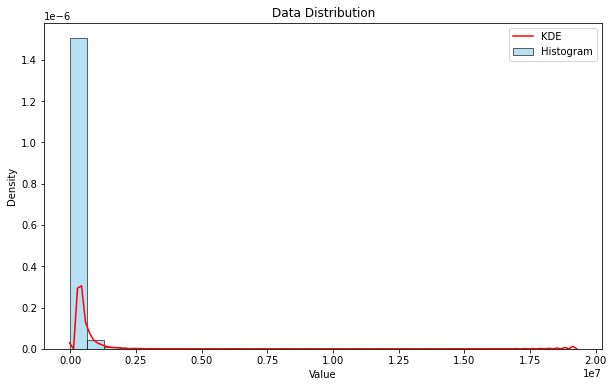

In [21]:
factor_distribution_plot(volmin_sh000)

<ipython-input-23-b7298c9764ba>:1: RuntimeWarning: divide by zero encountered in log
  factor_distribution_plot(dropinf(np.log(volmin_sh000)))


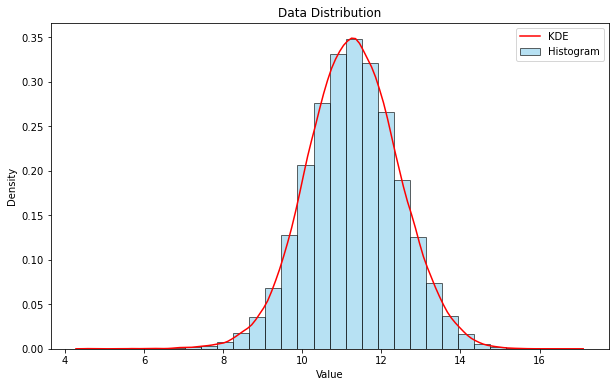

In [23]:
factor_distribution_plot(dropinf(np.log(volmin_sh000)))

In [64]:
eg = dropinf(np.log(volmin_sh000))
eg = ((eg.T - eg.mean(axis=1)) / eg.std(axis=1)).T
eg.skew(axis=1).mean()

<ipython-input-64-edb90f3ce2fa>:1: RuntimeWarning: divide by zero encountered in log
  eg = dropinf(np.log(volmin_sh000))


0.12110674422025523

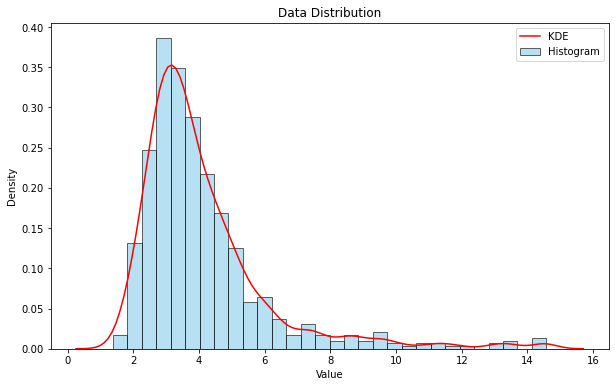

In [28]:
factor_distribution_plot(volmin_sh000.skew(axis=1))

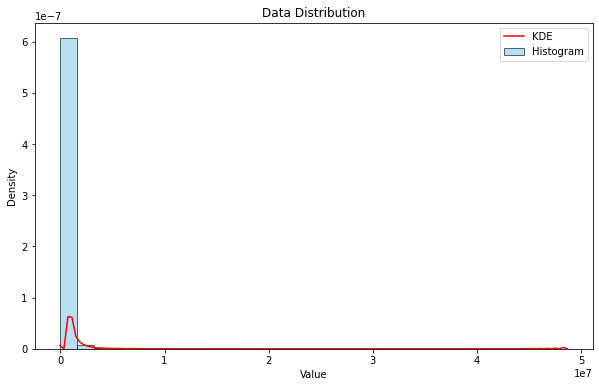

In [36]:
volmin_SH933 = volmin.xs('SH601933', level='InstrumentID').unstack()
factor_distribution_plot(volmin_SH933)

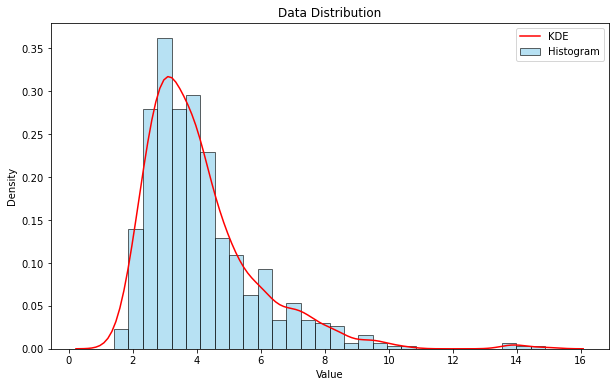

In [39]:
factor_distribution_plot(dropinf(volmin_SH933.skew(axis=1)))

In [45]:
pmin = data2123['Close'].xs('SH600000', level='InstrumentID').unstack()
pmin

EndTime,09:30,09:31,09:32,09:33,09:34,09:35,09:36,09:37,09:38,09:39,...,14:51,14:52,14:53,14:54,14:55,14:56,14:57,14:58,14:59,15:00
Date,,,,,,,,,,,,,,,,,,,,,
20210104,NaN,9.64,9.60,9.60,9.58,9.58,9.56,9.60,9.57,9.56,...,9.69,9.69,9.70,9.69,9.69,9.71,9.69,9.69,9.69,9.69
20210105,NaN,9.66,9.64,9.65,9.64,9.65,9.64,9.61,9.60,9.60,...,9.66,9.67,9.66,9.67,9.67,9.68,9.66,9.66,9.66,9.68
20210106,NaN,9.63,9.68,9.69,9.71,9.73,9.73,9.73,9.70,9.70,...,9.81,9.82,9.82,9.81,9.82,9.82,9.81,9.81,9.81,9.82
20210107,NaN,9.86,9.91,9.88,9.81,9.78,9.81,9.83,9.83,9.84,...,9.76,9.77,9.79,9.79,9.81,9.78,9.80,9.80,9.80,9.81
20210108,NaN,9.85,9.86,9.82,9.85,9.84,9.82,9.79,9.80,9.83,...,9.80,9.80,9.82,9.81,9.82,9.82,9.81,9.81,9.81,9.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20230928,7.15,7.16,7.15,7.15,7.15,7.14,7.16,7.15,7.15,7.15,...,7.11,7.12,7.12,7.12,7.12,7.12,7.11,7.11,7.11,7.10
20231009,7.08,7.04,7.02,7.03,7.03,7.03,7.02,7.03,7.01,7.01,...,7.05,7.04,7.03,7.04,7.04,7.04,7.05,7.05,7.05,7.03
20231010,7.13,7.09,7.10,7.08,7.09,7.06,7.07,7.05,7.07,7.06,...,7.03,7.03,7.03,7.03,7.02,7.02,7.02,7.04,7.04,7.01


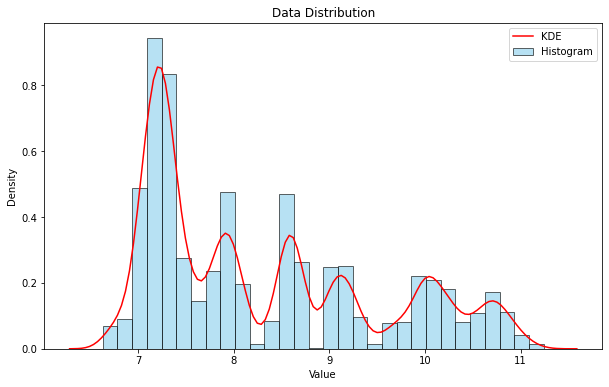

In [46]:
factor_distribution_plot(pmin)

In [51]:
p_close = datadaily.close.loc[20210101:20231231]
ret_p = (p_close - p_close.shift(1)) / p_close.shift(1)

In [53]:
ret_p = ret_p.applymap(lambda x:np.nan if abs(x) > 0.31 else x)

<ipython-input-56-63de49a3d204>:1: RuntimeWarning: divide by zero encountered in log
  factor_distribution_plot(dropinf(ret_p.applymap(lambda x: np.log(x) if x>0 else -np.log(-x))))


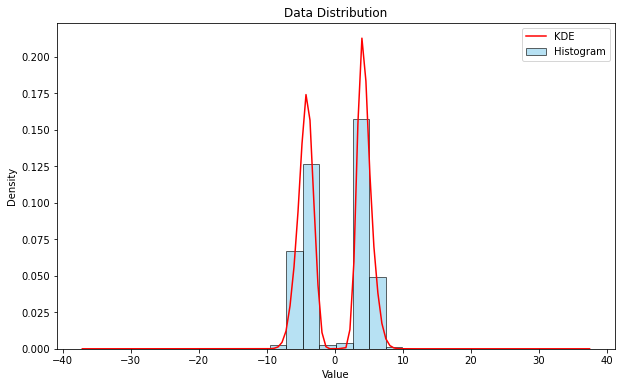

In [56]:
factor_distribution_plot(dropinf(ret_p.applymap(lambda x: np.log(x) if x>0 else -np.log(-x))))